# Notebook for re-ingesting ComCam data.

Initially written 15 Nov 2019 by Craig Lage\
This ingests the images into my own repo, \
creates the master bias images, and ingests them.\
02-Dec-19 - I've added the master flats and master darks.

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          18.1.0-2-gb0efc0e+61 	current w_2019_47 setup


In [2]:
import eups
import sys, os, glob
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

from lsst.daf.persistence import Butler

In [3]:
DATA_DIR = '/project/shared/comCam/'
REPO_DIR = '/home/cslage/ComCam/20191113J/'
raftName = 'R22'

In [9]:
# First check the exposure times
filedir = DATA_DIR+'raw/20191113/'
files = glob.glob(filedir+'CC_C_20191113_00????/CC_C_20191113_00????_R22_S00.fits')
filedir = DATA_DIR+'raw/20191114/'
files += glob.glob(filedir+'CC_C_20191114_00????/CC_C_20191114_00????_R22_S00.fits')
files = np.sort(files)
numFiles = len(files)
print(numFiles)

for file in files:
    hdulist = pf.open(file, mode='readonly', do_not_scale_image_data=True)
        
    phdr=hdulist[0].header
    filename = phdr['FILENAME']
    exptime = phdr['EXPTIME']
    imgtype = phdr['IMGTYPE'] 
    print("%s\t%s\t%f"%(filename, imgtype, exptime))

309
CC_C_20191113_000001_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000002_R22_S00.fits	EXPOSE	1.000000
CC_C_20191113_000003_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000004_R22_S00.fits	EXPOSE	1.000000
CC_C_20191113_000005_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000006_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000007_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000008_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000009_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000010_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000011_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000012_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000013_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000014_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000015_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000016_R22_S00.fits	EXPOSE	0.100000
CC_C_20191113_000017_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000018_R22_S00.fits	EXPOSE	0.100000
CC_C_20191113_000019_R22_S00.fits	BIAS	0.000000
CC_C_20191113_000020_R22_S00.fits	EXPOSE	0.200000
CC_C_20191113_000021_R22_S

In [10]:
# Now ingest the images
! mkdir -p {REPO_DIR}
! echo "lsst.obs.lsst.comCam.LsstComCamMapper" > {REPO_DIR+"_mapper"}
args = REPO_DIR + " " + DATA_DIR + "raw/20191113/*/*.fits" + " " + "--mode=link"
! ingestImages.py {args}
args = REPO_DIR + " " + DATA_DIR + "raw/20191114/*/*.fits" + " " + "--mode=link"
! ingestImages.py {args}

root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/ingest.py'
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/comCam/ingest.py'
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading Posix exposure registry from /home/cslage/ComCam/20191113J
ingest INFO: /project/shared/comCam/raw/20191113/CC_C_20191113_000001/CC_C_20191113_000001_R22_S00.fits --<link>--> /home/cslage/ComCam/20191113J/raw/unknown/R22/2019111300001-R22-S00-det000-000.fits
ingest INFO: /project/shared/comCam/raw/20191113/CC_C_20191113_000001/CC_C_20191113_000001_R22_S01.fits --<link>--> /home/cslage/ComCam/20191113J/raw/unknown/R22/2019111300001-R22-S01-det001-000.fits
ingest INFO: /project/shared/comCam/raw/20191113/CC_C_20191113_000001/CC_C_20191113_000001_R22_S02.fits --<link>--> /home/cslage/ComCam

In [11]:
# Now create a master bias
start=2019111300005
end=2019111300014
CALIB_DIR = REPO_DIR + "CALIB"
RERUN_DIR = REPO_DIR + "calib_construction"
! mkdir -p {CALIB_DIR}
args = REPO_DIR + " --calib " + CALIB_DIR + " --rerun " + RERUN_DIR + " --id visit=%d..%d"%(start,end) + \
" --batch-type=None" + " -c isr.doCrosstalk=False" + " --clobber-config"
! constructBias.py {args}

root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/bias.py'
/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/pex_config/18.1.0-6-gae77429+4/python/lsst/pex/config/config.py:1289: FutureWarning: Config field isr.doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  FutureWarning)
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
specified the number of threads using one of the OpenBLAS environment variables:
OPENBLAS_NUM_THREADS, GOTO_NUM_THREADS, OMP_NUM_THREADS.
This may indicate that you are unintentionally using multiple threads, which may
cause problems. WE HAVE THEREFORE DISABLED OpenBLAS THREADING. If you know
what you are doing and want threads enabled implicitly, set the environment
variable LSST_ALLOW_IMPLICIT_THREADS.


In [27]:
# Now ingest the master bias images
args = REPO_DIR + " " + RERUN_DIR + "/bias/*/*.fits" + " --validity 9999" + " --calib " + CALIB_DIR + " --mode=link"
! ingestCalibs.py {args} 

root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/ingestCalibs.py'
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/bias/2019-11-13/bias-R22-S00-det000_2019-11-13.fits --<link>--> /home/cslage/ComCam/20191113J/CALIB/bias/2019-11-13/bias-R22-S00-det000_2019-11-13.fits
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/bias/2019-11-13/bias-R22-S01-det001_2019-11-13.fits --<link>--> /home/cslage/ComCam/20191113J/CALIB/bias/2019-11-13/bias-R22-S01-det001_2019-11-13.fits
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/bias/2019-11-13/bias-R22-S02-det002_2019-11-13.fits --<link>--> /home/cslage/ComCam/20191113J/CALIB/bias/2019-11-13/bias-R22-S02-det002_2019-11-13.fits
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/bias/2019-11-1

In [44]:
# Now create a master dark
# It failed with the default number of cosmic ray pixels = 10000
# Increased this to 100,000 and then it ran.
visits = []
starting_visit = 2019111400018
ending_visit = 2019111400022
visit = starting_visit
while visit < ending_visit + 1:
    visits.append(visit)
    visit += 2
print(len(visits))
CALIB_DIR = REPO_DIR + "CALIB"
RERUN_DIR = REPO_DIR + "calib_construction"

args = REPO_DIR + " --calib " + CALIB_DIR + " --rerun " + RERUN_DIR + " --id visit="
for visit in visits:
    if visit != starting_visit:
        args += "^"
    args += str(visit)

args += " --batch-type=None" + " -c isr.doCrosstalk=False repair.cosmicray.nCrPixelMax=100000" + " --clobber-config"
print(args)
! constructDark.py {args}

3
/home/cslage/ComCam/20191113J/ --calib /home/cslage/ComCam/20191113J/CALIB --rerun /home/cslage/ComCam/20191113J/calib_construction --id visit=2019111400018^2019111400020^2019111400022 --cores=2 -c isr.doCrosstalk=False repair.cosmicray.nCrPixelMax=100000 --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/dark.py'
/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/pex_config/18.1.0-6-gae77429+4/python/lsst/pex/config/config.py:1289: FutureWarning: Config field isr.doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  FutureWarning)
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
CameraMapper INFO: Loading calib registry from /home/cslage/ComCam/20191113J/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading c

In [53]:
# Now ingest the master dark images
args = REPO_DIR + " " + RERUN_DIR + "/dark/*/*.fits" + " --validity 9999" + " --calib " + CALIB_DIR + " --mode=link"
! ingestCalibs.py {args} 

root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/ingestCalibs.py'
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
CameraMapper INFO: Loading calib registry from /home/cslage/ComCam/20191113J/CALIB/calibRegistry.sqlite3
ingestCalibs.register INFO: Table "bias" exists.  Skipping creation
ingestCalibs.register INFO: Table "dark" exists.  Skipping creation
ingestCalibs.register INFO: Table "flat" exists.  Skipping creation
ingestCalibs.register INFO: Table "fringe" exists.  Skipping creation
ingestCalibs.register INFO: Table "sky" exists.  Skipping creation
ingestCalibs.register INFO: Table "defects" exists.  Skipping creation
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/dark/2019-11-15/dark-R22-S00-det000_2019-11-15.fits --<link>--> /home/cslage/ComCam/20191113J/CALIB/dark/2019-11-15/dark-R22-S00-det000_2019-11-15.fits
inges

In [55]:
# Now create a master flat
visits = []
starting_visit = 2019111300044
ending_visit = 2019111300062
visit = starting_visit
while visit < ending_visit + 1:
    visits.append(visit)
    visit += 2
print(len(visits))
CALIB_DIR = REPO_DIR + "CALIB"
RERUN_DIR = REPO_DIR + "calib_construction"

args = REPO_DIR + " --calib " + CALIB_DIR + " --rerun " + RERUN_DIR + " --id visit="
for visit in visits:
    if visit != starting_visit:
        args += "^"
    args += str(visit)

args += " batch-type=None" + " -c isr.doCrosstalk=False" + " --clobber-config"
print(args)
! constructFlat.py {args}

10
/home/cslage/ComCam/20191113J/ --calib /home/cslage/ComCam/20191113J/CALIB --rerun /home/cslage/ComCam/20191113J/calib_construction --id visit=2019111300044^2019111300046^2019111300048^2019111300050^2019111300052^2019111300054^2019111300056^2019111300058^2019111300060^2019111300062 --cores=2 -c isr.doCrosstalk=False --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/flat.py'
/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/pex_config/18.1.0-6-gae77429+4/python/lsst/pex/config/config.py:1289: FutureWarning: Config field isr.doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  FutureWarning)
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
CameraMapper INFO: Loading calib registry from /home/cslage/ComCam/201

In [57]:
# Now ingest the master flat images
args = REPO_DIR + " " + RERUN_DIR + "/flat/*/*/*.fits" + " --validity 9999" + " --calib " + CALIB_DIR + " --mode=link"
! ingestCalibs.py {args} 

root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/obs_lsst/18.1.0-29-gb94f4f4+6/config/ingestCalibs.py'
CameraMapper INFO: Loading exposure registry from /home/cslage/ComCam/20191113J/registry.sqlite3
CameraMapper INFO: Loading calib registry from /home/cslage/ComCam/20191113J/CALIB/calibRegistry.sqlite3
ingestCalibs.register INFO: Table "bias" exists.  Skipping creation
ingestCalibs.register INFO: Table "dark" exists.  Skipping creation
ingestCalibs.register INFO: Table "flat" exists.  Skipping creation
ingestCalibs.register INFO: Table "fringe" exists.  Skipping creation
ingestCalibs.register INFO: Table "sky" exists.  Skipping creation
ingestCalibs.register INFO: Table "defects" exists.  Skipping creation
ingestCalibs INFO: /home/cslage/ComCam/20191113J/calib_construction/flat/NONE/2019-11-13/flat_NONE-R22-S00-det000_2019-11-13.fits --<link>--> /home/cslage/ComCam/20191113J/CALIB/flat/NONE/2019-11-13/flat_NONE-R22-S00-det000_2

In [69]:
# Now let's try running the ISR on a spot image. This is the lowest exposure.
spot_visit = 2019111300231
butler = Butler(REPO_DIR)
rawSpot = butler.get('raw', detector=4, visit=spot_visit)
# this is the dataRef for running isr
rawSpotDataRef = butler.dataRef('raw', detector=4, visit=spot_visit)

from lsst.ip.isr.isrTask import IsrTask
isrConfig = IsrTask.ConfigClass()
isrConfig.doLinearize = False
isrConfig.doBias = True
isrConfig.doFlat = True
isrConfig.doDark = True
isrConfig.doFringe = False
isrConfig.doDefect = False
isrConfig.doAddDistortionModel = False
isrConfig.doWrite = False
isrTask = IsrTask(config=isrConfig)
# run the task and take the exposure
postIsrSpot = isrTask.runDataRef(rawSpotDataRef).exposure

/opt/lsst/software/stack/stack/miniconda3-4.7.10-4d7b902/Linux64/pex_config/18.1.0-6-gae77429+4/python/lsst/pex/config/config.py:1289: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  FutureWarning)


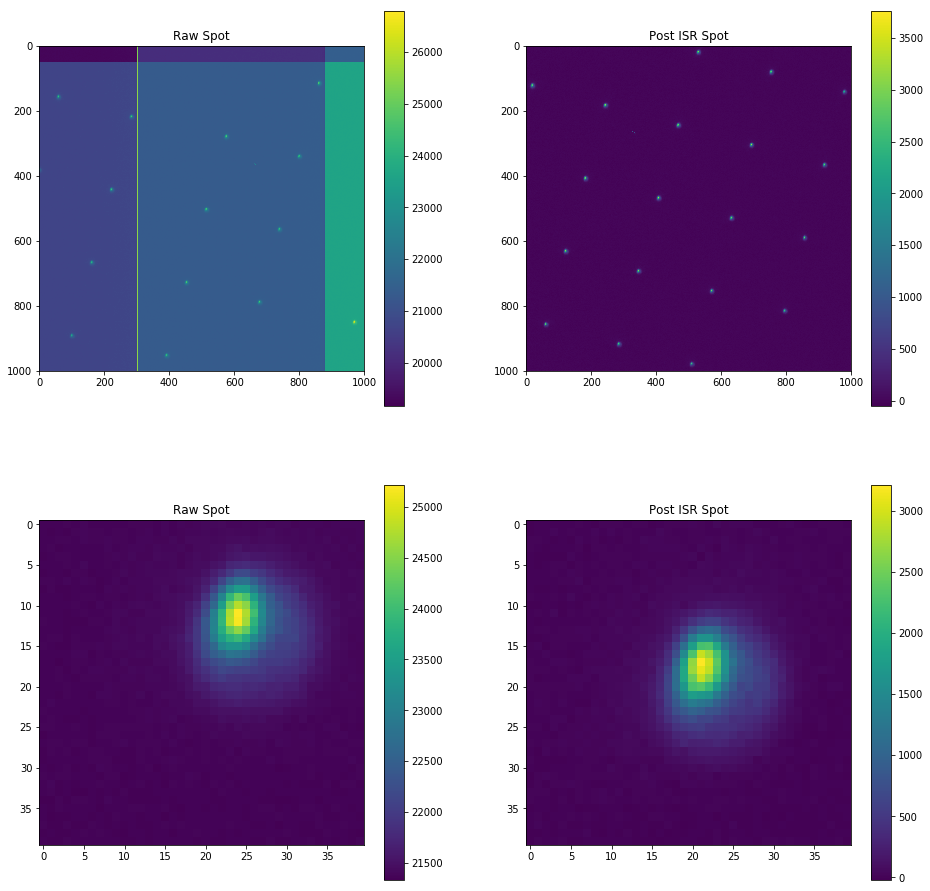

In [85]:
# Now just look at a portion of the images
plt.figure(figsize=(16,16))    
plt.subplot(2,2,1)
plt.title("Raw Spot")
plt.imshow(rawSpot.image.array[2000:3000,2000:3000])
plt.colorbar()
plt.subplot(2,2,2)
plt.title("Post ISR Spot")
plt.imshow(postIsrSpot.image.array[2000:3000,2000:3000])
plt.colorbar()
plt.subplot(2,2,3)
plt.title("Raw Spot")
plt.imshow(rawSpot.image.array[2490:2530,2490:2530])
plt.colorbar()
plt.subplot(2,2,4)
plt.title("Post ISR Spot")
plt.imshow(postIsrSpot.image.array[2510:2550,2610:2650])
plt.colorbar()


Detected  294  objects 


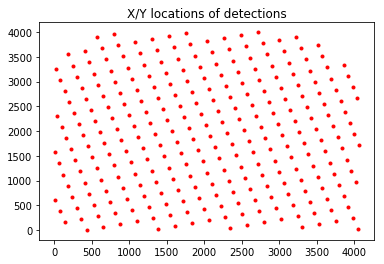

In [86]:
# Now let's try finding the spots
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask, CharacterizeImageConfig
charConfig = CharacterizeImageConfig()
charConfig.installSimplePsf.fwhm = 1.0
charConfig.doMeasurePsf = False
charConfig.doApCorr = False
charConfig.doDeblend = False
charConfig.repair.doCosmicRay = True
charConfig.repair.doInterpolate = False   
charConfig.detection.background.binSize = 32
charConfig.detection.minPixels = 100
charTask = CharacterizeImageTask(config=charConfig)
charResult = charTask.run(postIsrSpot)

print("Detected ",len(charResult.sourceCat)," objects ")

plt.title('X/Y locations of detections')
plt.plot(charResult.sourceCat['base_SdssCentroid_x'],charResult.sourceCat['base_SdssCentroid_y'],'r.')
plt.show()